<a href="https://colab.research.google.com/github/rbehjati/softmax/blob/main/DissectingSoftmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dissecting Softmax

Softmax is a multivariate and vector-valued function, and is not easy to visualize. But for a given input vector, we can plot the output of softmax over the input.

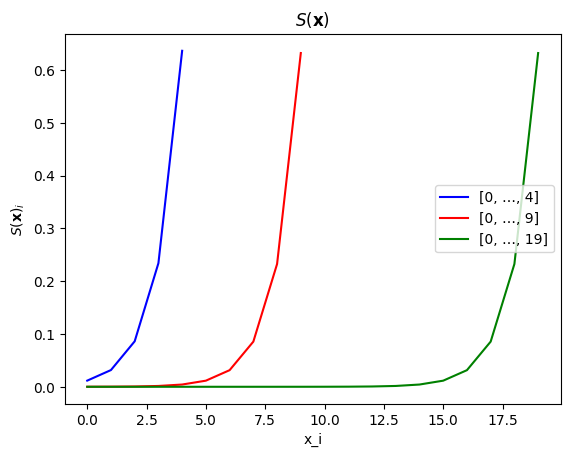

In [1]:
#@title Softmax of a few example input vectors
# Visualizing softmax
import numpy as np
from scipy.special import softmax

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x0 = np.arange(5)
x1 = np.arange(10)
x2 = np.arange(20)

y0 = softmax(x0)
y1 = softmax(x1)
y2 = softmax(x2)

c= ["blue", "red", "green", "olive", "pink", "black"]

headings = []
l, = ax.plot(x0, y0, c[0])
headings.append(l)
l, = ax.plot(x1, y1, c[1])
headings.append(l)
l, = ax.plot(x2, y2, c[2])
headings.append(l)

ax.set_title("$S(\mathbf{x})$")
ax.set(xlabel='x_i', ylabel='$S(\mathbf{x})_i$')
ax.legend(headings, ["[0, …, 4]", "[0, …, 9]", "[0, …, 19]"])


In [2]:
#@title Example input and output
# A simple example
import numpy as np
from scipy.special import softmax
np.set_printoptions(precision=5)

x = np.array([-1, 0.5, 5, -0.3, 1, 1.7, 0.6, 3.2])

print("   x:", x)
print("S(x):", softmax(x))

   x: [-1.   0.5  5.  -0.3  1.   1.7  0.6  3.2]
S(x): [0.00198 0.00888 0.79913 0.00399 0.01464 0.02947 0.00981 0.1321 ]


In [3]:
#@title Softmax it yourself!
y = x.flatten()
n = np.exp(y)/sum(np.exp(y))
print(n.sum())
n.reshape(x.shape)

0.9999999999999999


array([0.00198, 0.00888, 0.79913, 0.00399, 0.01464, 0.02947, 0.00981,
       0.1321 ])

# Softmax magnifies differences

It is often said that softmax is sensitive to differences in input values, and magnifies those differences. In this section, we want to understand what that actually means.

In [3]:
#@title setup
import numpy as np
from scipy.special import softmax

import matplotlib.pyplot as plt

def softmax_and_plot_1d(x, axis=None):
  fig, ax = plt.subplots()

  ax.set(xlabel='$x_i$', ylabel='$S(\mathbf{x})_i$')
  ax.set_title("$S(\mathbf{x})$")
  ax.set_aspect(10)

  x = np.sort(x)
  y = softmax(x)

  ax.plot(x, y, "b")

   x: mean and std: (0.0, 5.916079783099616)
S(x): mean and std: (0.024390243902439025, 0.07333990680114759)


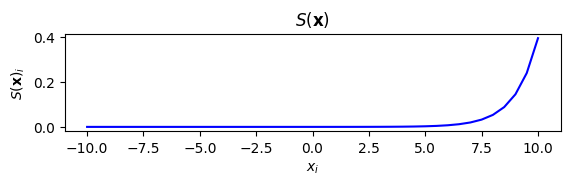

In [4]:
a = np.arange(-10, 10.5, 0.5)
softmax_and_plot_1d(a)
b = softmax(a)
print("   x: mean and std:", (a.mean(), a.std()))
print("S(x): mean and std:", (b.mean(), b.std()))

In [ ]:
# Try a few other vectors
# softmax_and_plot_1d(np.array([-8, -4, -2, -1, 0, 1, 2, 4, 8, 10, 12, 16]))
# softmax_and_plot_1d(np.array([-3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))
# softmax_and_plot_1d(np.arange(-10, 10, 0.1))

# Scaling the input vector

With a sufficiently large scaling factor, softmax behaves like argmax with a one-hot representation.

[Text(0.5, 0, '$x_i$'), Text(0, 0.5, '$S(8\\mathbf{x})_i$')]

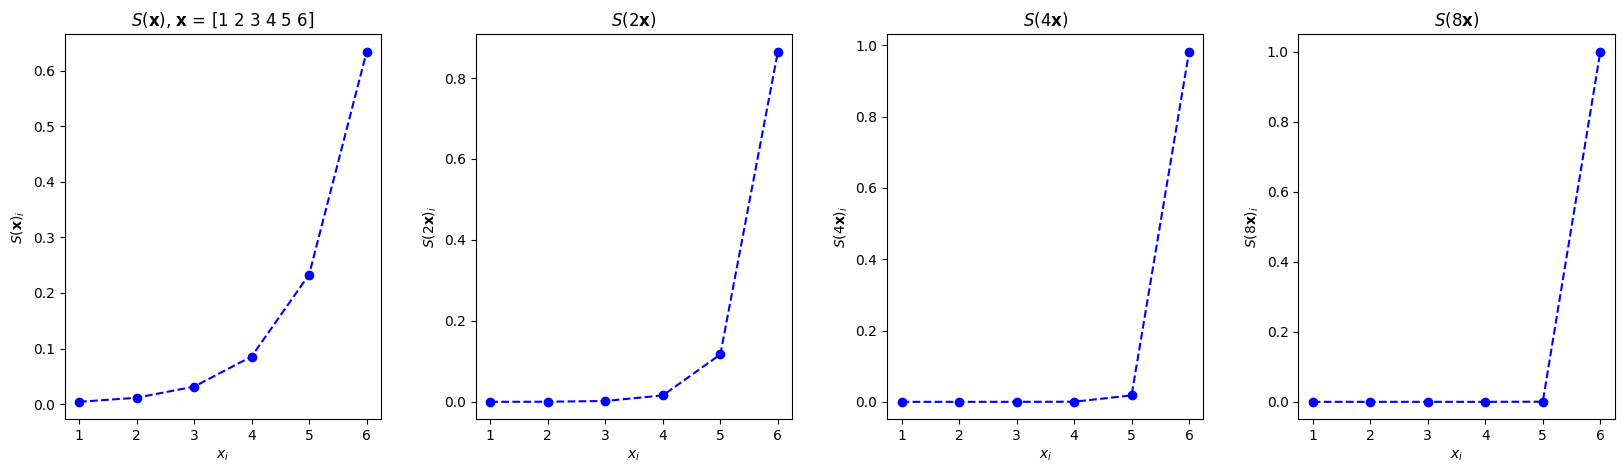

In [5]:
import numpy as np
from scipy.special import softmax

import matplotlib.pyplot as plt

x = np.arange(1, 7)
fig, ax = plt.subplots(1, 4, figsize=(5*4, 5))
fig.subplots_adjust(wspace = 0.3)

ax[0].set_title("$S(\mathbf{x})$, $\mathbf{x}$ = " + str(x))
ax[0].plot(x, softmax(x), '--bo')
ax[0].set(xlabel='$x_i$', ylabel='$S(\mathbf{x})_i$')

ax[1].set_title("$S(2\mathbf{x})$")
ax[1].plot(x, softmax(np.dot(x, 2)), '--bo')
ax[1].set(xlabel='$x_i$', ylabel='$S(2\mathbf{x})_i$')

ax[2].set_title("$S(4\mathbf{x})$")
ax[2].plot(x, softmax(np.dot(x, 4)), '--bo')
ax[2].set(xlabel='$x_i$', ylabel='$S(4\mathbf{x})_i$')

ax[3].set_title("$S(8\mathbf{x})$")
ax[3].plot(x, softmax(np.dot(x, 8)), '--bo')
ax[3].set(xlabel='$x_i$', ylabel='$S(8\mathbf{x})_i$')

# Does softmax have a fixed point?

The output of softmax is itself a vector. What happens if we repeatedly apply softmax to its output?

[Text(0.5, 0, 'n'), Text(0, 0.5, '$x_1-x_0$')]

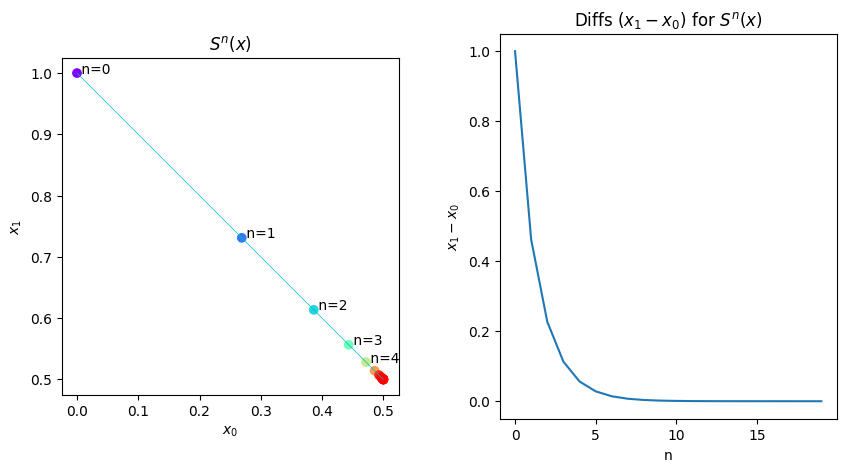

In [7]:
#@title Repeated application of softmax to "[0, 1]"
import numpy as np
from scipy.special import softmax

import matplotlib.pyplot as plt
from matplotlib import cm

p = [0, 1] # This already is a probability. Let's see how it changes if we repeatedly apply softmax on it.

points = [p]

# We are also interested in the diff between the two coordinates.
diffs = [1]

n = 20
for i in range(n-1):
  p = softmax(p)
  diffs.append(p[1]-p[0])
  points.append(p)

cols = 2
fig, ax = plt.subplots(1, cols, figsize=(5*cols, 5))
fig.subplots_adjust(wspace = 0.3)

x = [p[0] for p in points]
y = [p[1] for p in points]
colors = cm.rainbow(np.linspace(0, 3, len(y)))
ax[0].scatter(x, y, color=colors)
ax[0].plot(x, y, color="c", linestyle="-", linewidth=0.5)
ax[0].set_title("$S^n(x)$")
ax[0].set(xlabel='$x_0$', ylabel='$x_1$')
ax[0].set_aspect('equal', adjustable='box')

for i in range(5):
    ax[0].annotate(" n="+str(i), (x[i], y[i]))

ax[1].plot(range(n), diffs)
ax[1].set_title("Diffs ($x_1-x_0$) for $S^n(x)$")
ax[1].set(xlabel='n', ylabel='$x_1-x_0$')

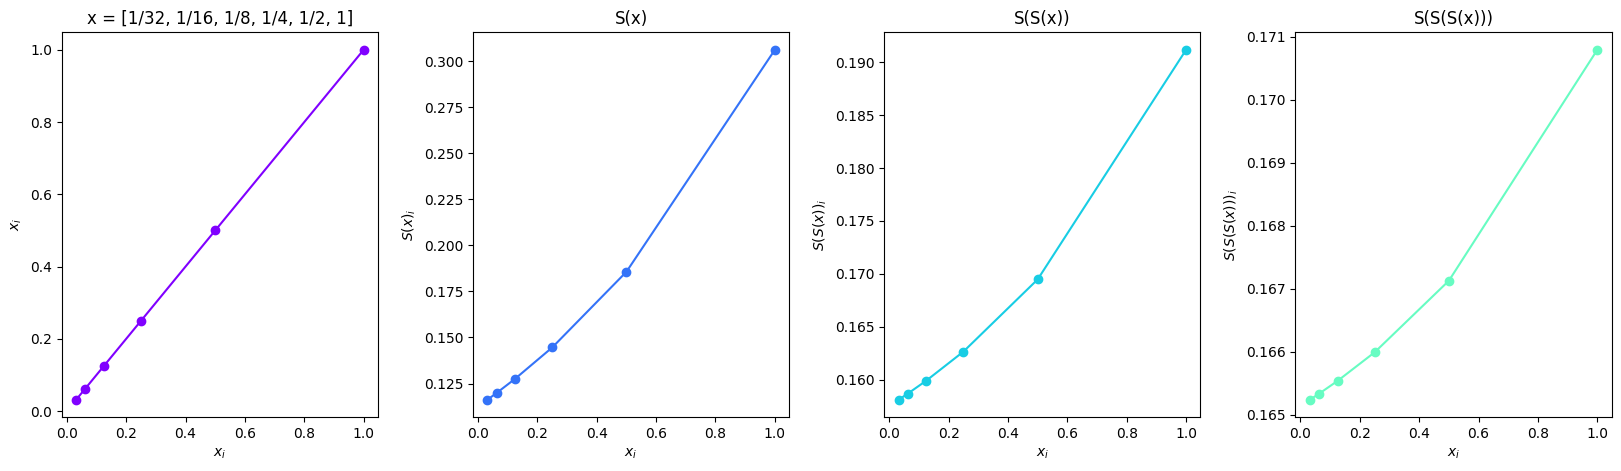

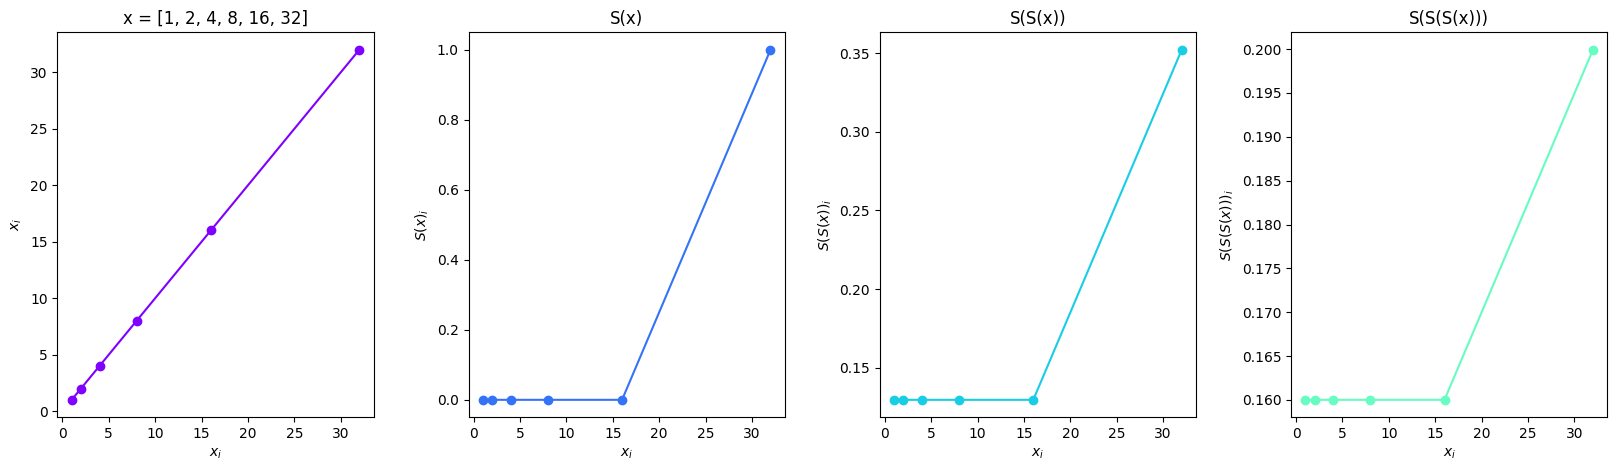

In [8]:
#@title More examples of repeatedly applying softmax
# Repeatedly applying softmax on more interesting vectors.
import numpy as np
from scipy.special import softmax

import matplotlib.pyplot as plt
from matplotlib import cm

def repeat_softmax(x, xstr):
  fig, ax = plt.subplots(1, 4, figsize=(5*4, 5))
  fig.subplots_adjust(wspace = 0.3)
  fig.subplots_adjust(hspace = 0.4)

  # Generate the same colors as above.
  colors = cm.rainbow(np.linspace(0, 3, 21))

  ax[0].set_title(f"x = {xstr}")
  ax[0].plot(x, x, color=colors[0], marker='o')
  ax[0].set(xlabel="$x_i$", ylabel="$x_i$")

  ax[1].set_title("S(x)")
  ax[1].plot(x, softmax(x), color=colors[1], marker='o')
  ax[1].set(xlabel="$x_i$", ylabel="$S(x)_i$")

  ax[2].set_title("S(S(x))")
  ax[2].plot(x, softmax(softmax(x)), color=colors[2], marker='o')
  ax[2].set(xlabel="$x_i$", ylabel="$S(S(x))_i$")

  ax[3].set_title("S(S(S(x)))")
  ax[3].plot(x, softmax(softmax(softmax(x))), color=colors[3], marker='o')
  ax[3].set(xlabel="$x_i$", ylabel="$S(S(S(x)))_i$")

x = [1/32, 1/16, 1/8, 1/4, 1/2, 1]
repeat_softmax(x, "[1/32, 1/16, 1/8, 1/4, 1/2, 1]")

x = [1, 2, 4, 8, 16, 32]
repeat_softmax(x, str(x))

# The impact of softmax on mean and standard deviation


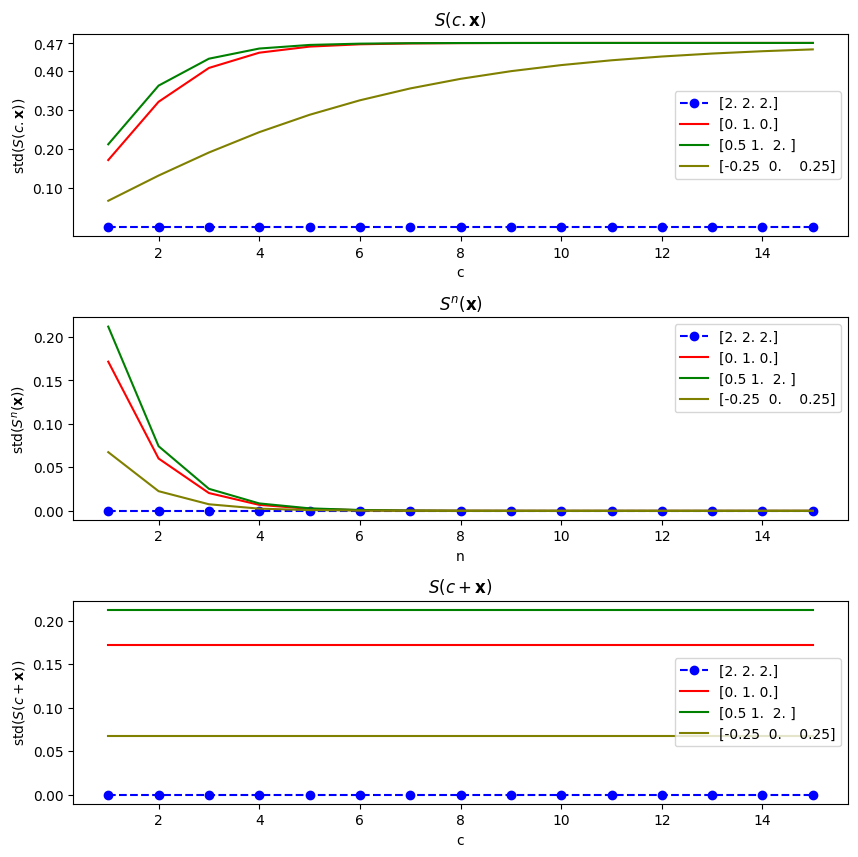

In [7]:
#@title Mean and standard deviation
import numpy as np
from scipy.special import softmax

import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1, figsize=(5*2, 10))
fig.subplots_adjust(hspace = 0.4)

# Some random starting vectors.
x = np.array([[2, 2, 2], [0, 1, 0], [1/2, 1, 2], [-1/4, 0, 1/4]])
s = x
# S(c.x)
scx = x.std(axis=1)
# S^n(x)
snx = x.std(axis=1)
# S(c+x)
ssx = x.std(axis=1)

n = 16

for i in range(1, n):
  scx = np.append(scx, softmax(np.dot(x, i), axis=1).std(axis=1))
  s = softmax(s, axis=1)
  snx= np.append(snx, s.std(axis=1))
  ssx = np.append(ssx, softmax(x + i, axis=1).std(axis=1))

scx = np.transpose(np.reshape(scx, (n, 4)))
snx = np.transpose(np.reshape(snx, (n, 4)))
ssx = np.transpose(np.reshape(ssx, (n, 4)))
c= ["--ob", "red", "green", "olive", "pink", "y", "black"]

h0 = []
h1 = []
h2 = []
for i in range(0, 4):
  l, = ax[0].plot(range(1, n), scx[i][1:], c[i])
  h0.append(l)
  l, = ax[1].plot(range(1, n), snx[i][1:], c[i])
  h1.append(l)
  l, = ax[2].plot(range(1, n), ssx[i][1:], c[i])
  h2.append(l)

ax[0].set_title("$S(c.\mathbf{x})$")
ax[0].set(xlabel='c', ylabel='std($S(c.\mathbf{x})$)')
ax[0].legend(h0, x)
ax[0].set_yticks([0.1, 0.2, 0.3, 0.4, 0.47])

ax[1].set_title("$S^n(\mathbf{x})$")
ax[1].set(xlabel='n', ylabel='std($S^n(\mathbf{x})$)')
ax[1].legend(h1, x)

ax[2].set_title("$S(c+\mathbf{x})$")
ax[2].set(xlabel='c', ylabel='std($S(c+\mathbf{x})$)')
ax[2].legend(h2, x)


# Partial derivatives

Derivative of $ S(x)_i $ with respect to $ x_j $:

[Text(0.5, 0, '$x_0$')]

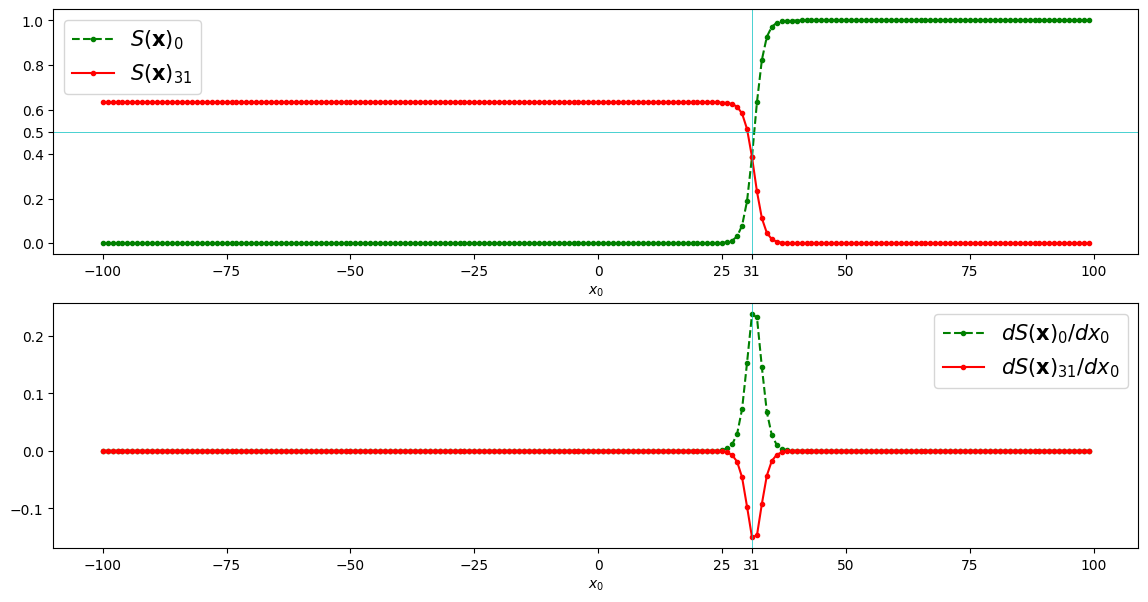

In [8]:
#@title Partial derivatives
import numpy as np
from scipy.special import softmax

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(14, 7))
fig.subplots_adjust(wspace = 0.3)

x = np.arange(0, 32)
y = softmax(x)

# Collect values of x_0, and x_i, and thier derivatives.
i= 31
sx0 = []
sxi = []
dx0 = []
dxi = []

max = 100

for x0 in range(-max, max):
  x[0] = x0
  y = softmax(x)
  sx0.append(y[0])
  sxi.append(y[i])
  dxi.append(-y[0]*y[i])
  dx0.append(y[0]* (1-y[0]))

sx0 = np.asarray(sx0)
sxi = np.asarray(sxi)
dsxi = np.asarray(dxi)
dsx0 = np.asarray(dx0)
c= ["--g.", "-r."]

l1, = ax[0].plot(range(-max, max), sx0, c[0])
l2, = ax[0].plot(range(-max, max), sxi, c[1])
ax[0].axhline(y=0.5, color="c", linestyle="-", linewidth=0.5)
ax[0].axvline(x=31, color="c", linestyle="-", linewidth=0.5)
ax[0].set_yticks([0, 0.2, 0.4, 0.5, 0.6, 0.8, 1])
ax[0].set_xticks([-100, -75, -50, -25, 0, 25, 31, 50, 75, 100])

l3, = ax[1].plot(range(-max, max), dsx0, c[0])
l4, = ax[1].plot(range(-max, max), dsxi, c[1])
ax[1].axvline(x=31, color="c", linestyle="-", linewidth=0.5)

ax[0].legend([l1, l2], ["$S(\mathbf{x})_0$", "$S(\mathbf{x})_{31}$"], fontsize="15")
ax[1].legend([l3, l4], ["$dS(\mathbf{x})_0/dx_0$", "$dS(\mathbf{x})_{31}/dx_0$"], fontsize="15")
ax[1].set_xticks([-100, -75, -50, -25, 0, 25, 31, 50, 75, 100])

ax[0].set(xlabel='$x_0$')
ax[1].set(xlabel='$x_0$')

# Softmax in higher dimensions


In [25]:
#@title Setup
import numpy as np
from scipy.special import softmax

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

def softmax_and_plot_2d(x, axis=None):
  if x.ndim == 2 and x.shape[0] == 2:
    y = softmax(x, axis)
    x1 = x[0]
    y1 = x[1]
    x2 = y[0]
    y2 = y[1]
  else:
    return

  cols = 2
  fig, ax = plt.subplots(1, cols, figsize=(5*cols, 5))
  fig.subplots_adjust(wspace = 0.3)

  ax[0].plot(x1, y1, "b")
  ax[0].plot(x1.mean(), y1.mean(), "bo")
  ax[0].set(xlabel='$x$', ylabel='$y$')
  ax[0].set_title("$\mathbf{v}$")
  ax[0].set_aspect('equal', adjustable='box')

  ax[1].axhline(y=y2.max(), color="pink", linestyle="-")
  ax[1].axhline(y=y2.min(), color="pink", linestyle="-")
  ax[1].axvline(x=x2.max(), color="pink", linestyle="-")
  ax[1].axvline(x=x2.min(), color="pink", linestyle="-")
  ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
  ax[1].set_yticks([y2.min(), 0.003, y2.mean(), 0.007, y2.max()])
  ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
  ax[1].set_xticks([x2.min(), x2.mean(), 0.008, x2.max()])

  ax[1].plot(x2, y2, "r")
  ax[1].plot(x2.mean(), y2.mean(), "ro")

  ax[1].set(xlabel='$\mathbf{s}[0]$', ylabel='$\mathbf{s}[1]$')
  ax[1].set_title("$\mathbf{s} = S(\mathbf{v})$")
  ax[1].set_aspect('equal', adjustable='box')

In [26]:
x = np.arange(-1, 1.01, 0.02)                 # 101 points in [-1, 1].
y = np.sqrt(np.absolute(1 - np.power(x, 2)))  # The upper semicircle.

x = np.concatenate((x, np.flip(x)), axis=None)
y = np.concatenate((y, np.flip(-y)), axis=None)
v = np.array([x, y])

In [27]:
s = softmax(v, axis=None)
print("x:", (x.min(), x.max(), x.mean(), x.std()))
print("y:", (y.min(), y.max(), y.mean(), y.std()))
print("v:", (v.min(), v.max(), v.mean(), v.std()))

x: (-1.0, 1.0000000000000018, 8.7938457396052e-16, 0.5830951894845305)
y: (-1.0, 1.0, 0.0, 0.8124038404635956)
v: (-1.0, 1.0000000000000018, 5.012492071574964e-16, 0.7071067811865476)


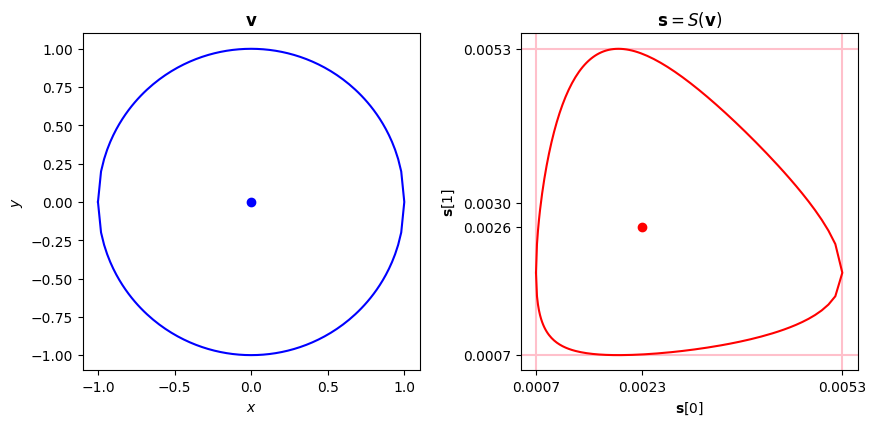

In [28]:
softmax_and_plot_2d(v)

In [29]:
s = softmax(v, axis=None)
print("   s:", (s.min(), s.max(), s.mean(), s.std()))
print("s[0]:", (s[0].min(), s[0].max(), s[0].mean(), s[0].std()))
print("s[1]:", (s[1].min(), s[1].max(), s[1].mean(), s[1].std()))

   s: (0.0007194029691222505, 0.0053157088965815925, 0.0024752475247524753, 0.001602819870143765)
s[0]: (0.0007194029691222505, 0.0053157088965815925, 0.002305351611530974, 0.001301867935059128)
s[1]: (0.0007194029691222505, 0.005315708896581583, 0.0026451434379739765, 0.001839965681544495)


In [14]:
# Lowest ((0, 1)) and highest ((0, -1)) points, and their transformations.
print(x[50], y[50], s[0][50], s[1][50])
print(x[151], y[151], s[0][151], s[1][151])

8.881784197001252e-16 1.0 0.001955540018304499 0.005315708896581583
8.881784197001252e-16 -1.0 0.001955540018304499 0.0007194029691222505


(0.0015450704358940025, 0.0030883335345840675)

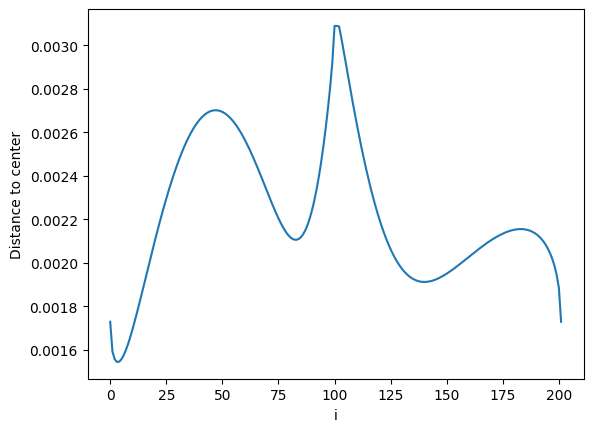

In [30]:
r = np.sqrt(np.power((s[0]-s[0].mean()), 2) + np.power((s[1]-s[1].mean()), 2))
plt.plot(range(0, len(r)), r)
plt.xlabel("i")
plt.ylabel("Distance to center")

(r.min(), r.max())

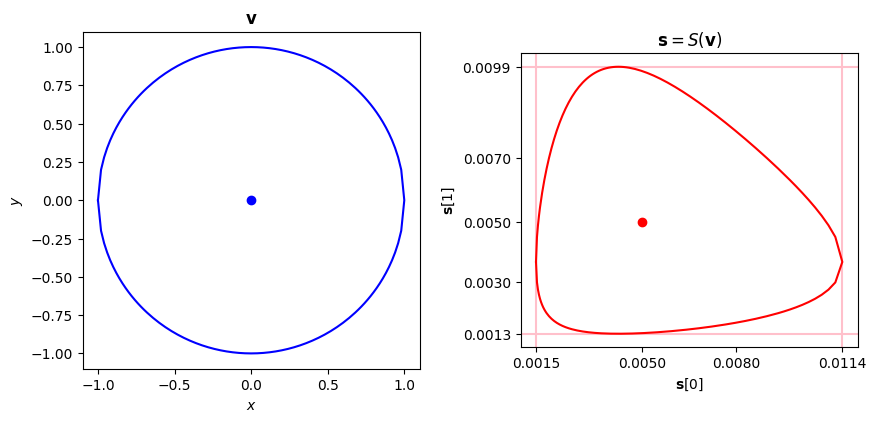

In [31]:
softmax_and_plot_2d(v, axis=1)

In [32]:
s = softmax(v, axis=1)
print(s.sum(), s.shape)
print((s.min(), s.max(), s.mean(), s.std()))
print((s[0].min(), s[0].max(), s[0].mean(), s[0].std(),))
print((s[1].min(), s[1].max(), s[1].mean(), s[1].std(),))

1.9999999999999998 (2, 202)
(0.00134639233022716, 0.011414914083175652, 0.00495049504950495, 0.0031363741782221856)
(0.0015448406305681732, 0.011414914083175652, 0.0049504950495049506, 0.002795621602962084)
(0.00134639233022716, 0.009948568459218446, 0.0049504950495049506, 0.003443571666843814)


(0.0033098791381297814, 0.006591996450403794)

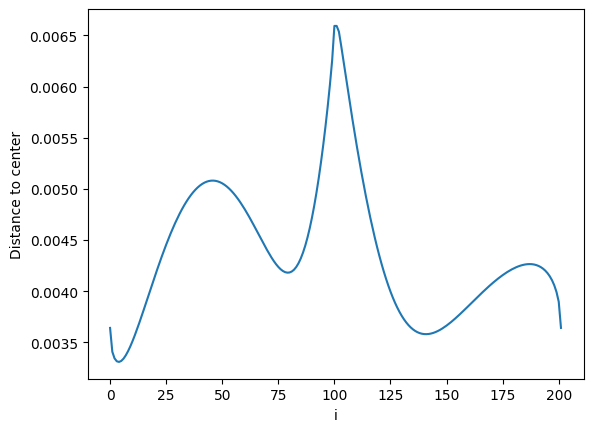

In [33]:
r = np.sqrt(np.power((s[0]-s[0].mean()), 2) + np.power((s[1]-s[1].mean()), 2))
plt.plot(range(0, len(r)), r)
plt.xlabel("i")
plt.ylabel("Distance to center")

(r.min(), r.max())

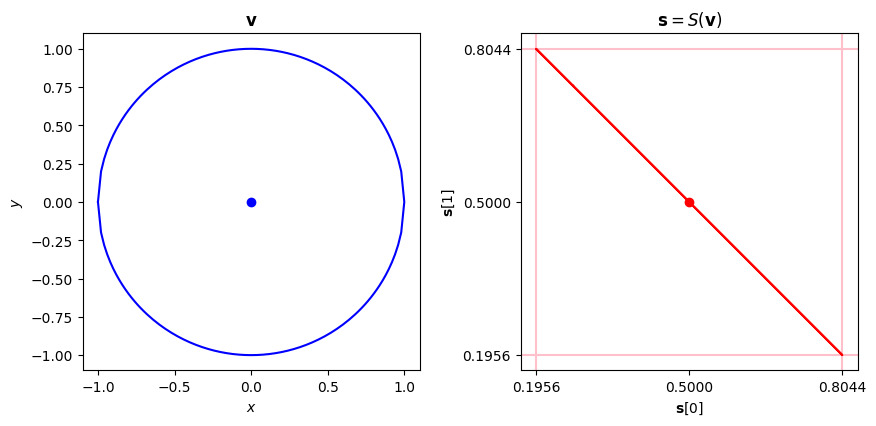

In [34]:
softmax_and_plot_2d(v, axis=0)

In [35]:
s = softmax(v, axis=0)
print(s.sum(), s.shape)
print((s.min(), s.max(), s.mean(), s.std()))
print((s[0].min(), s[0].max(), s[0].mean(), s[0].std(),))
print((s[1].min(), s[1].max(), s[1].mean(), s[1].std(),))

202.0 (2, 202)
(0.19558144350890763, 0.8044185564910924, 0.5, 0.22289260439121833)
(0.19558144350890763, 0.8044185564910924, 0.5000000000000002, 0.22289260439121833)
(0.19558144350890763, 0.8044185564910924, 0.4999999999999998, 0.22289260439121833)
